<a href="https://colab.research.google.com/github/Sanket0412/Embedded-Text-Detection-in-Video/blob/main/Embedded_Text_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Table of content
1. How to run
2. Dependencies
3. Sample data
4. Functions for preprocessing the image
5. Text Extraction - Mask Only
6. Text Extraction - Mask + Dilation
7. Text Extraction - Grayscale and Thresholding
8. Analysis of the results

# How to run
1. Open the link to the drive folder, it contains the sample images and videos with embedded text.
2. Change the path wherever needed.
3. Install pytesseract and other libraries.
4. Run the dependencies cell and then run each sell in sequence.
5. **Running this in Jyupiter Notebook is highly recommended for a better visualization of the result**

**change "cv2_imshow()" to "cv2.imshow()" 
                and 
remove "from google.colab.patches import cv2_imshow" from the dependencies cell**

In [ ]:
!pip install pytesseract 
! apt install tesseract-ocr
! apt install libtesseract-dev

# Dependencies

In [2]:
import cv2
import numpy as np
import pytesseract
from google.colab.patches import cv2_imshow

# Sample data

[Link](https://drive.google.com/drive/folders/1jkF-Iy1CHKkfiC99PbFK0Y5hv8_3lvST?usp=sharing) to the sample images and videos
1. Change the path wherever needed

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Functions for preprocessing the image

In [4]:
# get grayscale image
def get_grayscale(image):
    return cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
 
#thresholding
def thresholding(image):
    return cv2.threshold(image, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)[1]

# Text Extraction - Mask Only
1. Take the image and apply masking
2. The HSV lower/upper color range was determined with the help of this [link](https://stackoverflow.com/questions/24385714/detect-text-region-in-image-using-opencv)
3. Apply "pytesseract.image_to_string()" on the frame
4. print the text

In [5]:
def text_detection_mask_only(img):
  image = img

  hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
  lower = np.array([0, 0, 218])
  upper = np.array([157, 54, 255])
  mask = cv2.inRange(hsv, lower, upper)

  data = pytesseract.image_to_string(mask, lang='eng',config='--psm 6')

  print('Text detected after applying mask:')
  print(data)
  cv2.waitKey()
  return mask

## Text Extraction on video - Mask Only

Video used: "trimmedRickRoll.mp4"

In [6]:
import numpy as np
import cv2
cap = cv2.VideoCapture('/content/drive/MyDrive/OffNoteLabsTask/trimmedRickRoll.mp4')
#cap.set(cv2.CAP_PROP_FPS, 10000) 
i = 0;
while(cap.isOpened()):
    ret, frame = cap.read()
    if ret == False:
        break
    i+=1
    mask = text_detection_mask_only(frame)

    # USE THE CODE BELOW IN CASE OF JYUPITER NOTEBOOK 
    # TO SEE THE FRAME SIDE BY SIDE WITH THE EXTRACTED TEXT

    #cv2.imshow(frame)
    #cv2.imshow(result)
    
    if cv2.waitKey(2) & 0xFF == ord('q'):
        break
print(i)
cap.release()
cv2.destroyAllWindows()

Text detected after applying mask:
NEVER GOrNA GIVE
YOU UP

Text detected after applying mask:
NEVER GOrNA GIVE
YOU UP

Text detected after applying mask:
NEVER GOrNA GIVE
YOU UP

Text detected after applying mask:
NEVER GOrNA GIVE
YOU UP

Text detected after applying mask:
NEVER GOrNA GIVE
YOU UP

Text detected after applying mask:
NEVER GO::NA GIVE
YOU UP

Text detected after applying mask:
NEVER GO::NA GIVE
YOU UP

Text detected after applying mask:
NEVER GO::NA GIVE
YOU UP

Text detected after applying mask:
NEVER GO:r:NA GIVE
YOU UP

Text detected after applying mask:
NEVER GOr:NA GIVE
YOU UP

Text detected after applying mask:
NEVER GOr!NA GIVE
YOU UP

Text detected after applying mask:
NEVER GOr!NA GIVE
YOU UP

Text detected after applying mask:
NEVER GOr?NA GIVE
YOU UP

Text detected after applying mask:
NEVER GOrNA GIVE
YOU UP

Text detected after applying mask:
NEVER GO?!NA GIVE
YOU UP

Text detected after applying mask:
NEVER GO?!NA GIVE
YOU UP

Text detected

Video used: "trimmedNews.mp4"

In [7]:
import numpy as np
import cv2
cap = cv2.VideoCapture('/content/drive/MyDrive/OffNoteLabsTask/trimmedNews.mp4')
#cap.set(cv2.CAP_PROP_FPS, 10000) 
i = 0;
while(cap.isOpened()):
    ret, frame = cap.read()
    if ret == False:
        break
    i+=1
    mask = text_detection_mask_only(frame)
    
    # USE THE CODE BELOW IN CASE OF JYUPITER NOTEBOOK 
    # TO SEE THE FRAME SIDE BY SIDE WITH THE EXTRACTED TEXT

    #cv2.imshow(frame)
    #cv2.imshow(result)
    
    if cv2.waitKey(2) & 0xFF == ord('q'):
        break
print(i)
cap.release()
cv2.destroyAllWindows()

Text detected after applying mask:
Rt" WAR ON CORONA
© . :
ean 7 | MEDUCED IN

~ Ir LHI |

| ; LIT |

a7, | \ [ARVIND KEJRIWAL

Text detected after applying mask:
oe BOCK Reelre |
ea, b , Re
ns DUCED IN

= ln LHI |

| 7 LIT |

, | iB ce

Text detected after applying mask:
soe MIU Rey Reelrey |
’ rd . : 4
en ; DUCED IN

; - DELHI |

| / TIT |

I | { res L

Text detected after applying mask:
FX" WAR ON CORONA
j =
- | 8 DUCED IN

: _ DELHI |

Pant 7 ST TIT |
go | (201s ine

Text detected after applying mask:
PX"'Y WAR ON CORONA

arene A | EpuceD In
el 7 PFT |
ee For ana

Text detected after applying mask:
MX"Y WAR ON CORONA

sy

aan
| 7 TIT

a fs E | Ro |

Text detected after applying mask:
"J WAR ON CORONA

fant & ee
sf RN Mepucep In,
: - his |

=a | i orornr

Text detected after applying mask:
RJ WAR ON CORONA
ef RON Mepucep In,

“ . eT |

: = | Geno

Text detected after applying mask:
RJ WAR ON CORONA

ed ae.
a ns Mepucep In,

| o et |

= | arpa Prarie

Text detected after app

## Text Extraction on Images - Mask Only

Text detected after applying mask:
All women become

like their mothers. ,

MM at-len cmaatcireneecleicohe

No man does.

That's his. —

OSCAR WILDE 7 My

SOM,

eee Canva ‘ A
en = 8p aie



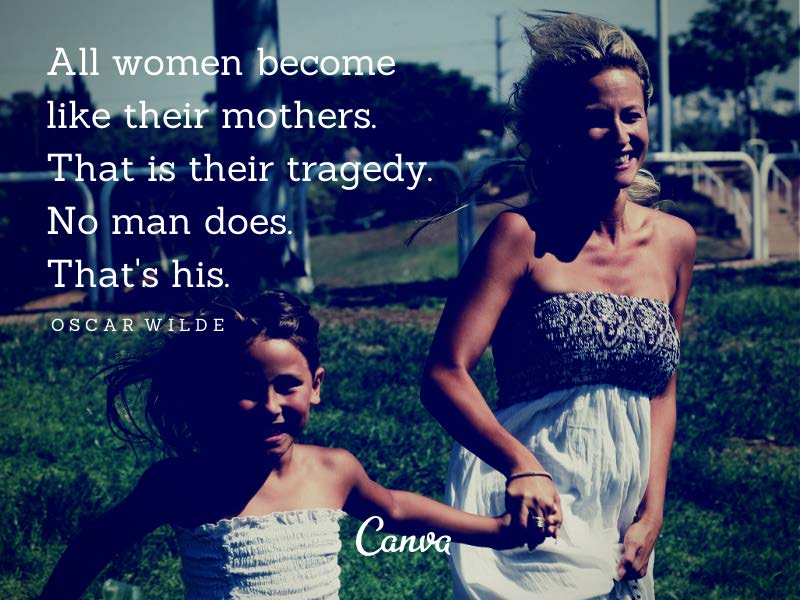

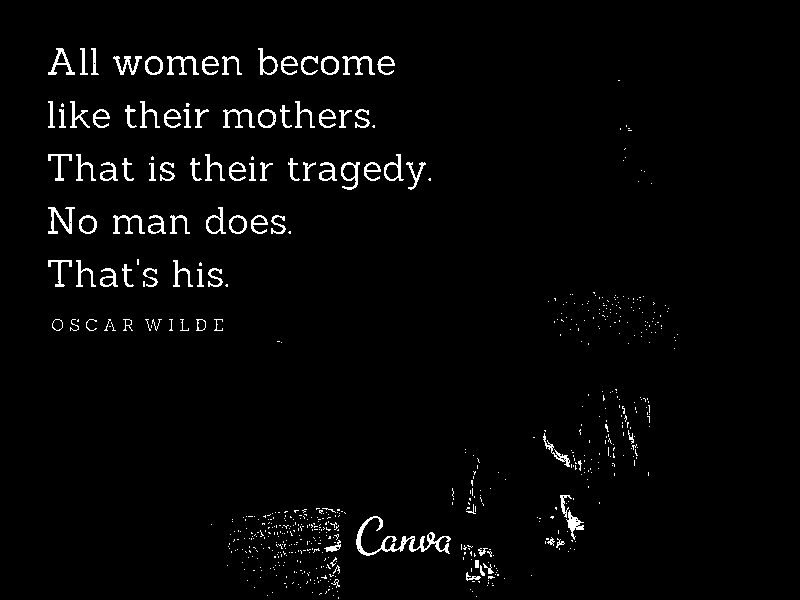

In [8]:
img = cv2.imread('/content/drive/MyDrive/OffNoteLabsTask/img.jpg')
mask = text_detection_mask_only(img)
cv2_imshow(img)
cv2_imshow(mask)

Text detected after applying mask:
ee
ae 2 eae
2 ans DUCED IN!
mN : . 7 STS
y ‘} ARVIND KEJRIWAL |
= paeerll ae Thay
Arvind Kejrnwal. Delhi Chief Minister Pron



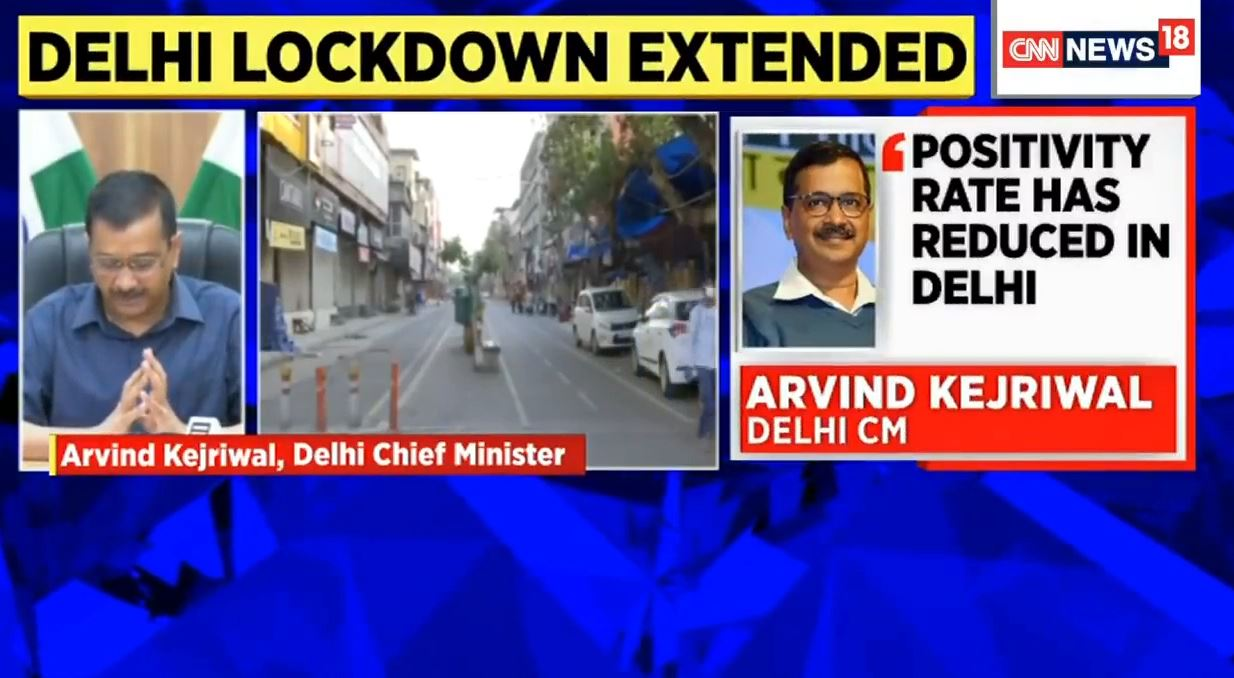

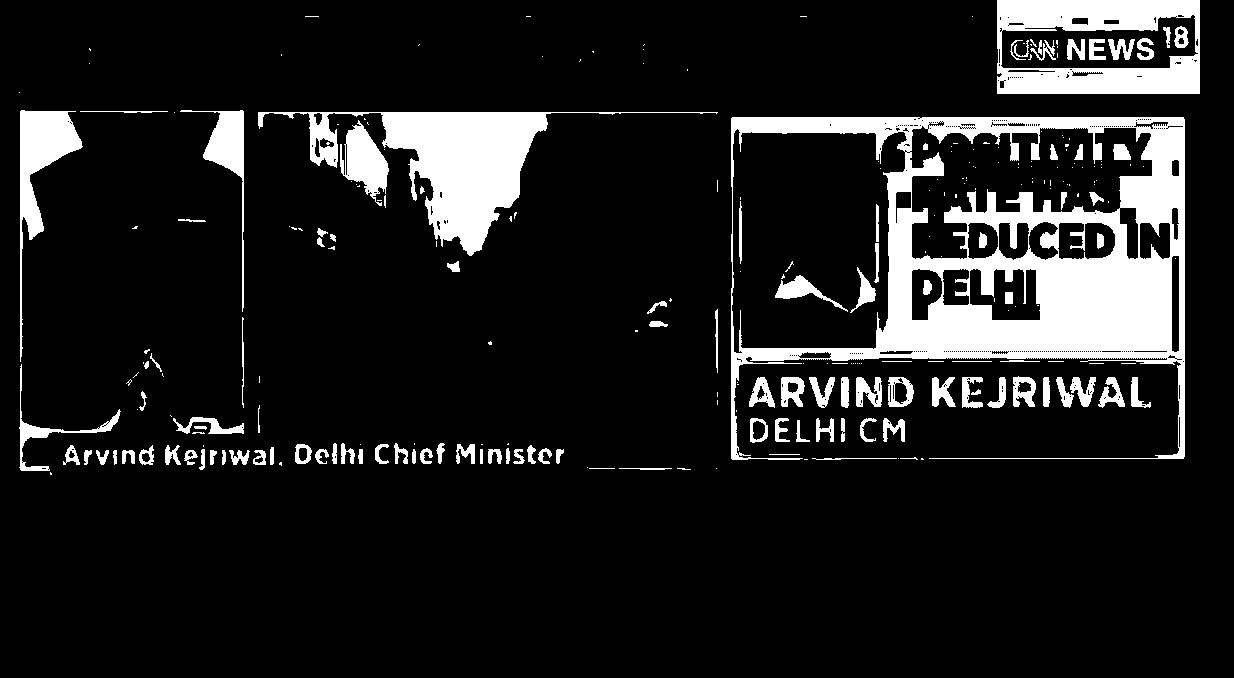

In [9]:
img = cv2.imread('/content/drive/MyDrive/OffNoteLabsTask/news.JPG')
mask = text_detection_mask_only(img)
cv2_imshow(img)
cv2_imshow(mask)

Text detected after applying mask:
Sample text here



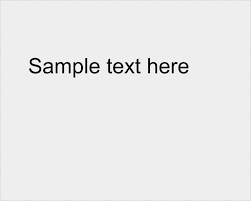

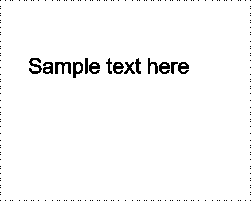

In [10]:
img = cv2.imread('/content/drive/MyDrive/OffNoteLabsTask/sampleText.png')
mask = text_detection_mask_only(img)
cv2_imshow(img)
cv2_imshow(mask)

Text detected after applying mask:
How to
turn on text
to speech



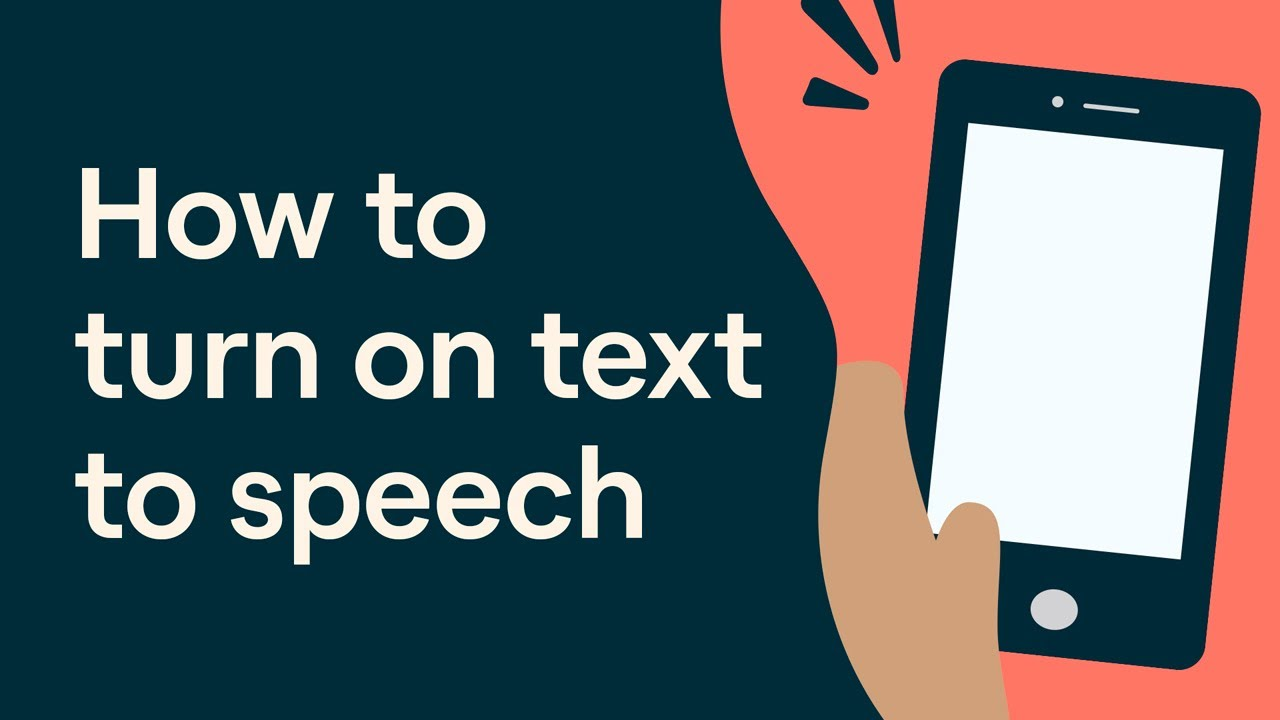

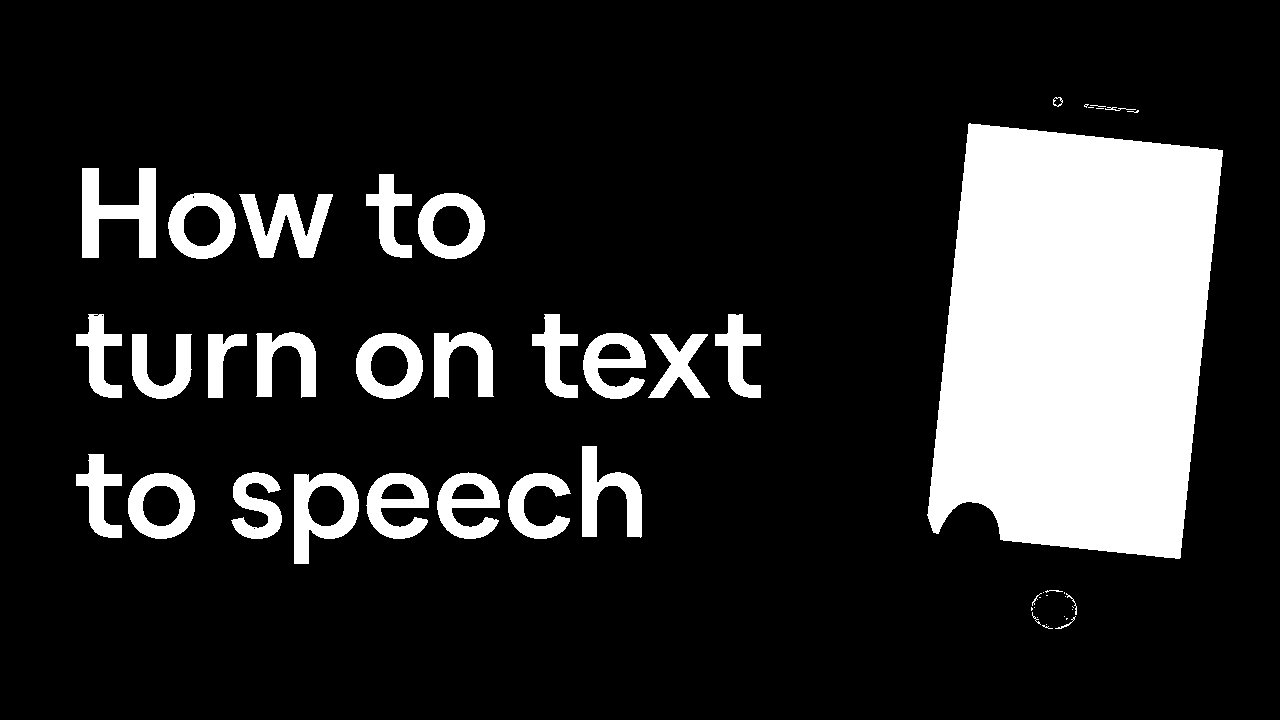

In [11]:
img = cv2.imread('/content/drive/MyDrive/OffNoteLabsTask/sampleText3.jpg')
mask = text_detection_mask_only(img)
cv2_imshow(img)
cv2_imshow(mask)

Text detected after applying mask:
VOUS a
YOURSELF, ‘NO MATTER
HOW HARD IT IS, OR
HOW HARD IT GETS, I'M
TTL a



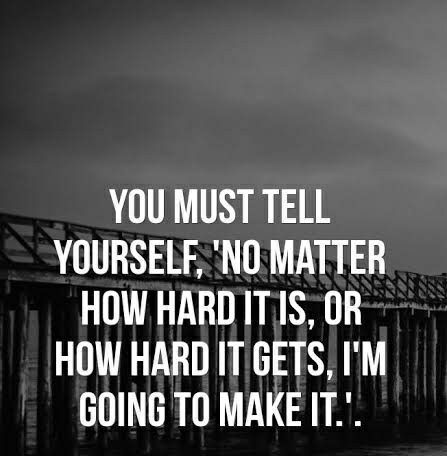

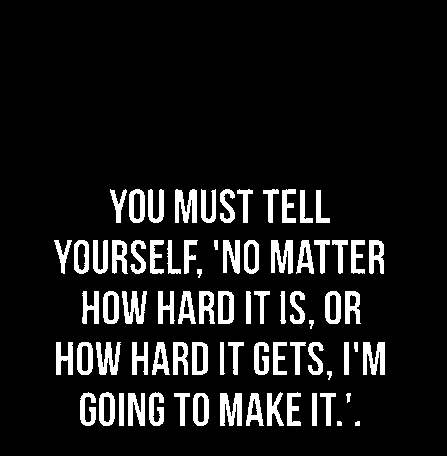

In [12]:
img = cv2.imread('/content/drive/MyDrive/OffNoteLabsTask/sampleText4.jpg')
mask = text_detection_mask_only(img)
cv2_imshow(img)
cv2_imshow(mask)

Text detected after applying mask:
Pace mnoca epemclics }

* doth utterly, ir,
tranquillity. intent <ataee

amongsolitaryaisyes

ground ~ "ver meadow

* motionstandingfeeding



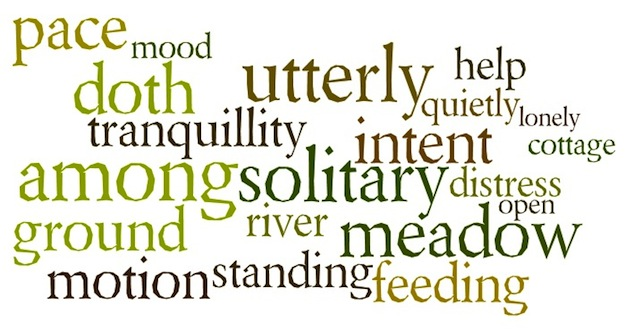

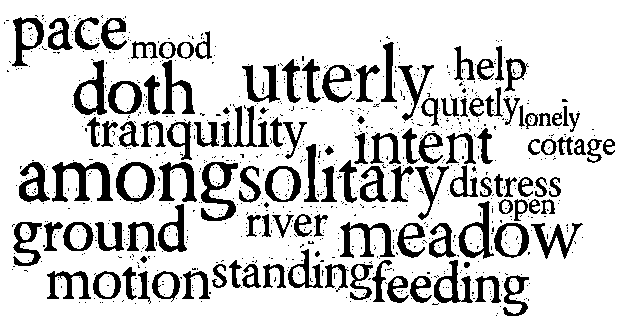

In [13]:
img = cv2.imread('/content/drive/MyDrive/OffNoteLabsTask/words.jpg')
mask = text_detection_mask_only(img)
cv2_imshow(img)
cv2_imshow(mask)

# Text Extraction - Mask + Dilation
1. Take the image and apply masking
2. The HSV lower/upper color range was determined with the help of this [link](https://stackoverflow.com/questions/24385714/detect-text-region-in-image-using-opencv)
3. Use "MORPH_RECT" Kernel to apply dialation to masked image.
4. Bitwise dilate image with mask and invert
4. Apply "pytesseract.image_to_string()" on the frame
5. print the text

In [14]:
def text_detection_mask_and_dialation(img):
  image = img
  hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
  lower = np.array([0, 0, 218])
  upper = np.array([157, 54, 255])
  mask = cv2.inRange(hsv, lower, upper)

  # Create horizontal kernel and dilate to connect text characters
  kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (5,3))
  dilate = cv2.dilate(mask, kernel, iterations=5)

  # Find contours and filter using aspect ratio
  # Remove non-text contours by filling in the contour
  cnts = cv2.findContours(dilate, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
  cnts = cnts[0] if len(cnts) == 2 else cnts[1]
  for c in cnts:
      x,y,w,h = cv2.boundingRect(c)
      ar = w / float(h)
      if ar < 5:
          cv2.drawContours(dilate, [c], -1, (0,0,0), -1)

  # Bitwise dilated image with mask, invert, then OCR
  result = 255 - cv2.bitwise_and(dilate, mask)
  data = pytesseract.image_to_string(result, lang='eng',config='--psm 6')

  print('Text detected after applying mask:')
  print(data)
  cv2.waitKey()
  return result

## Text Extraction on video and text - Mask + Dilation

Video used: "trimmedRickRoll.mp4"

In [15]:
import numpy as np
import cv2
cap = cv2.VideoCapture('/content/drive/MyDrive/OffNoteLabsTask/trimmedRickRoll.mp4')
#cap.set(cv2.CAP_PROP_FPS, 10000) 
i = 0;
while(cap.isOpened()):
    ret, frame = cap.read()
    if ret == False:
        break
    i+=1
    result = text_detection_mask_and_dialation(frame)
    
    # USE THE CODE BELOW IN CASE OF JYUPITER NOTEBOOK 
    # TO SEE THE FRAME SIDE BY SIDE WITH THE EXTRACTED TEXT

    #cv2.imshow(frame)
    #cv2.imshow(result)
    
    if cv2.waitKey(2) & 0xFF == ord('q'):
        break
print(i)
cap.release()
cv2.destroyAllWindows()

Text detected after applying mask:
NEVER GOrNA GIVE

Text detected after applying mask:
NEVER GOrNA GIVE

Text detected after applying mask:
NEVER GOrNA GIVE

Text detected after applying mask:
NEVER GOrNA GIVE

Text detected after applying mask:
NEVER GOriNA GIVE

Text detected after applying mask:
NEVER GO::NA GIVE

Text detected after applying mask:
NEVER GO::NA GIVE

Text detected after applying mask:
NEVER GO::NA GIVE

Text detected after applying mask:
NEVER GO:r:NA GIVE

Text detected after applying mask:
NEVER GOr:NA GIVE

Text detected after applying mask:
NEVER GOr!NA GIVE

Text detected after applying mask:
NEVER GOr!NA GIVE

Text detected after applying mask:
NEVER GOr?NA GIVE

Text detected after applying mask:
NEVER GOriNA GIVE

Text detected after applying mask:
NEVER GO?!NA GIVE

Text detected after applying mask:
NEVER GO?!NA GIVE

Text detected after applying mask:
NEVER GOi.NA GIVE

Text detected after applying mask:
NEVER GOi:NA GIVE

Text detected

Video used: "trimmedNews.mp4"

In [16]:
import numpy as np
import cv2
cap = cv2.VideoCapture('/content/drive/MyDrive/OffNoteLabsTask/trimmedNews.mp4')
#cap.set(cv2.CAP_PROP_FPS, 10000) 
i = 0;
while(cap.isOpened()):
    ret, frame = cap.read()
    if ret == False:
        break
    i+=1
    result = text_detection_mask_and_dialation(frame)
    
    # USE THE CODE BELOW IN CASE OF JYUPITER NOTEBOOK 
    # TO SEE THE FRAME SIDE BY SIDE WITH THE EXTRACTED TEXT

    #cv2.imshow(frame)
    #cv2.imshow(result)
    
    if cv2.waitKey(2) & 0xFF == ord('q'):
        break
print(i)
cap.release()
cv2.destroyAllWindows()

Text detected after applying mask:
CORONA

Text detected after applying mask:
CORONA

Text detected after applying mask:
CORONA

Text detected after applying mask:
CORONA

Text detected after applying mask:
CORONA

Text detected after applying mask:
CORONA

Text detected after applying mask:
CORONA

Text detected after applying mask:
CORONA

Text detected after applying mask:
CORONA

Text detected after applying mask:
CORONA

Text detected after applying mask:
CORONA

Text detected after applying mask:
CORONA

Text detected after applying mask:
CORONA

Text detected after applying mask:
CORONA

Text detected after applying mask:
CORONA

Text detected after applying mask:
CORONA

Text detected after applying mask:
CORONA

Text detected after applying mask:

Text detected after applying mask:

Text detected after applying mask:

Text detected after applying mask:

Text detected after applying mask:

Text detected after applying mask:

Text detected after applying m

## Text Extraction on Images - Mask + Dilation

Text detected after applying mask:
All women become
like their mothers.
That is their tragedy.
No man does.

That's his.

OSCAR WILDE



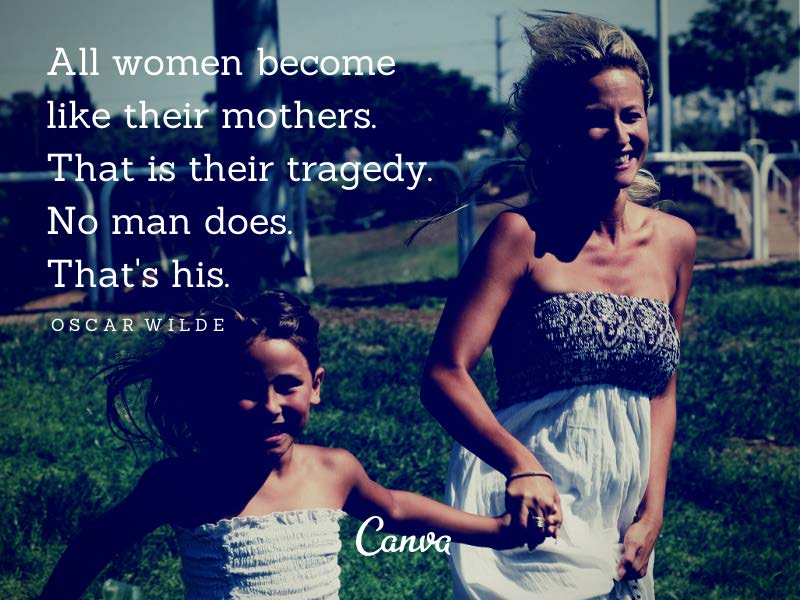

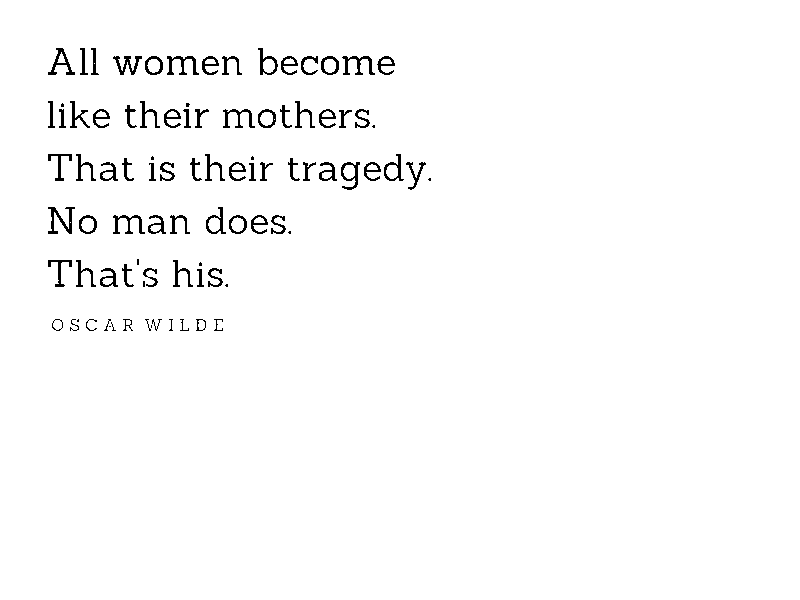

In [36]:
img = cv2.imread('/content/drive/MyDrive/OffNoteLabsTask/img.jpg')
result = text_detection_mask_and_dialation(img)
cv2_imshow(img)
cv2_imshow(result)

Text detected after applying mask:



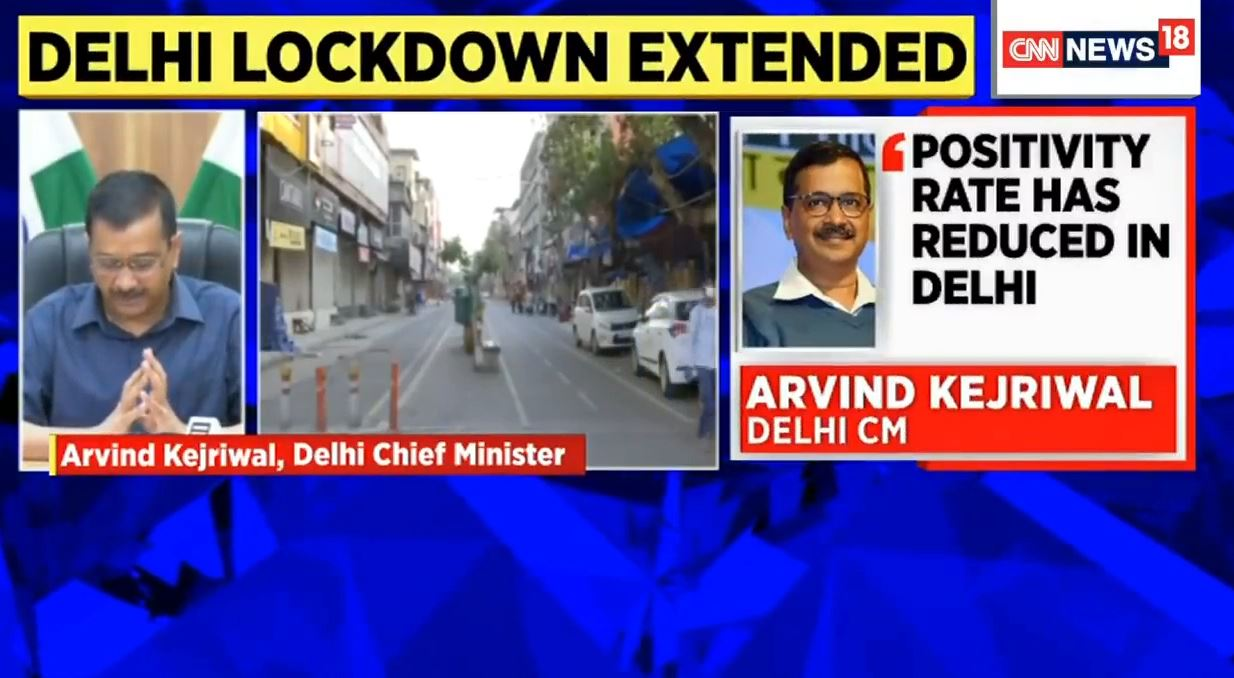

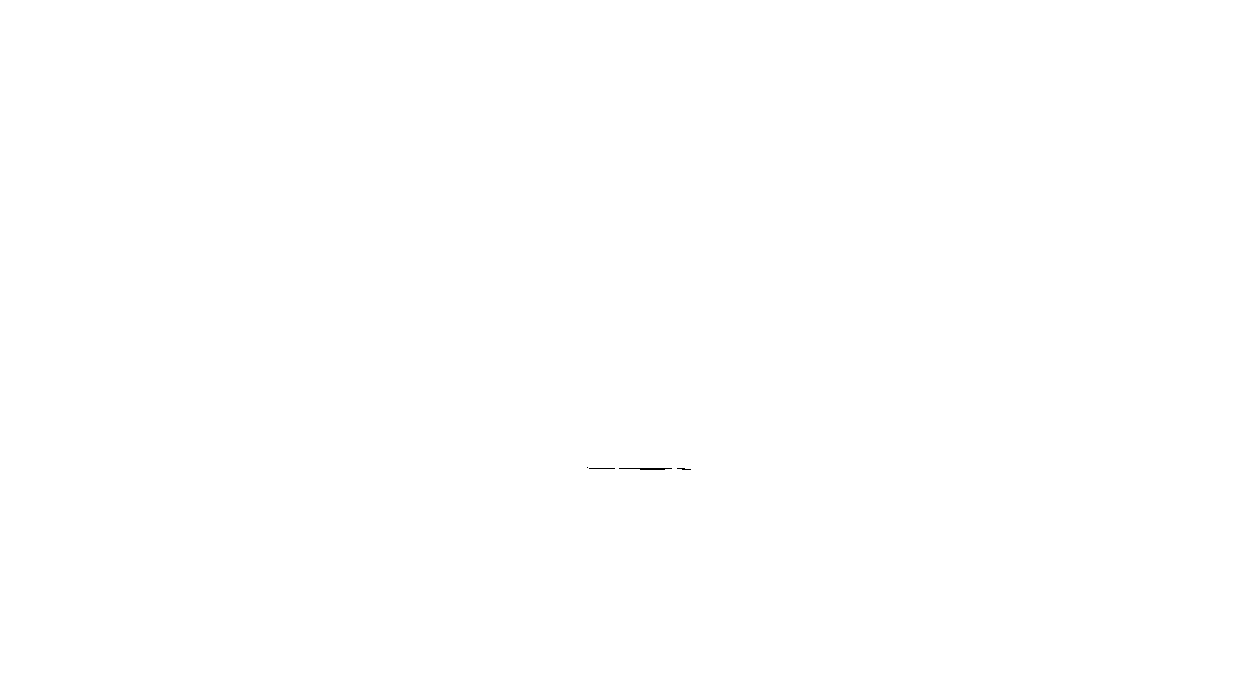

In [37]:
img = cv2.imread('/content/drive/MyDrive/OffNoteLabsTask/news.JPG')
result = text_detection_mask_and_dialation(img)
cv2_imshow(img)
cv2_imshow(result)

Text detected after applying mask:



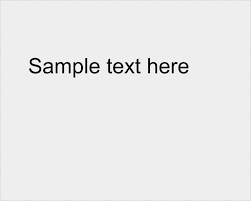

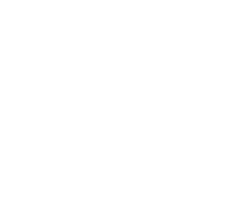

In [39]:
img = cv2.imread('/content/drive/MyDrive/OffNoteLabsTask/sampleText.png')
result = text_detection_mask_and_dialation(img)
cv2_imshow(img)
cv2_imshow(result)

Text detected after applying mask:



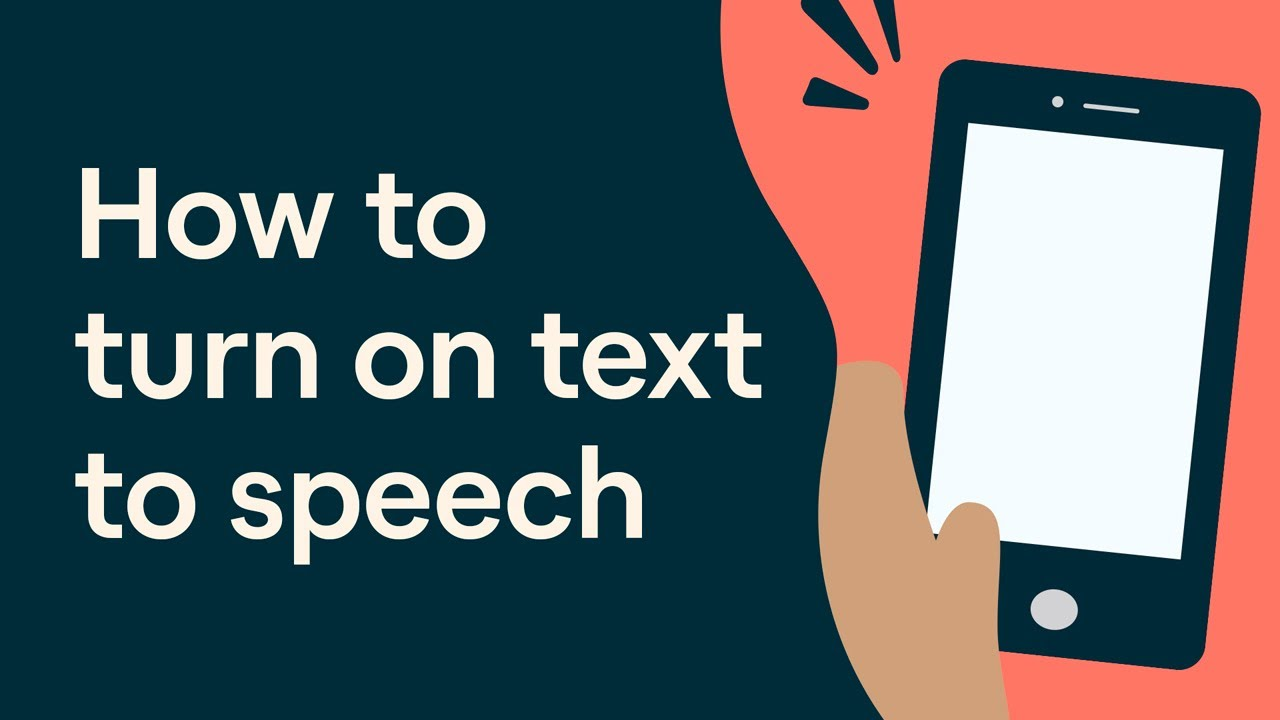

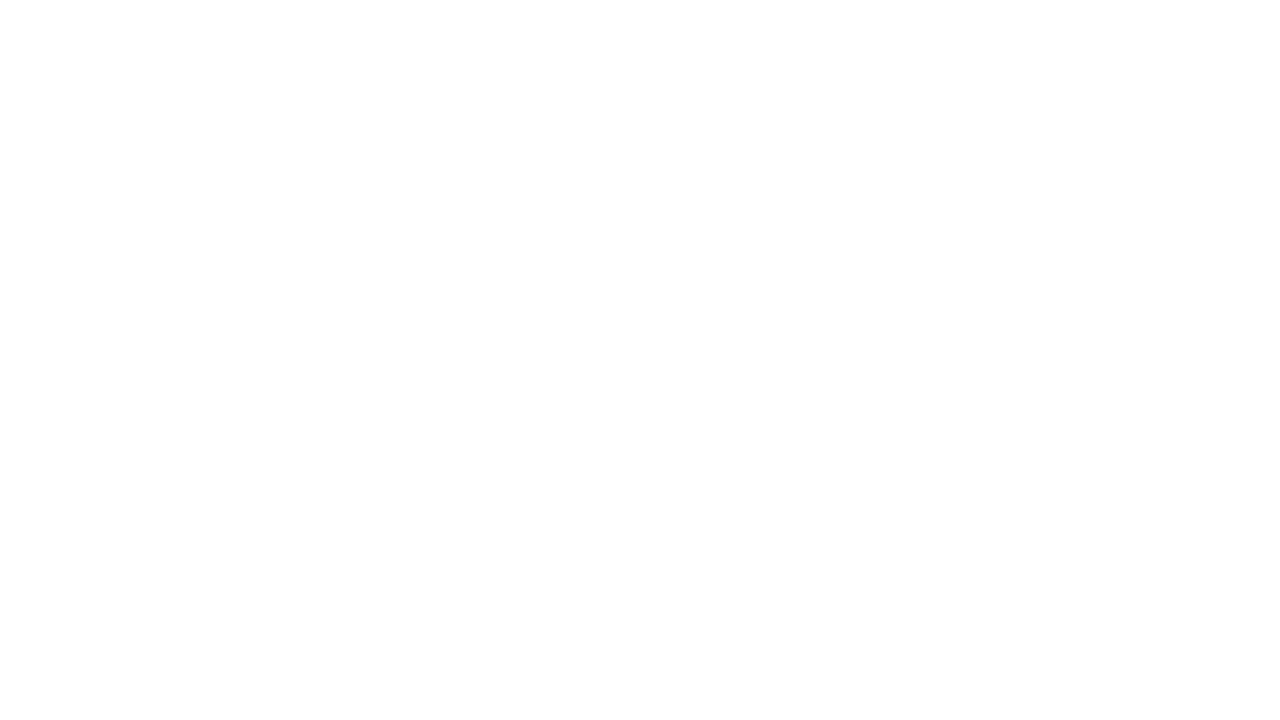

In [40]:
img = cv2.imread('/content/drive/MyDrive/OffNoteLabsTask/sampleText3.jpg')
result = text_detection_mask_and_dialation(img)
cv2_imshow(img)
cv2_imshow(result)

Text detected after applying mask:
YOU MUST TELL
YOURSELF, ‘NO MATTER
HOW HARD IT IS, OR
HOW HARD IT GETS, I'M
GOING TO MAKE IT.’.



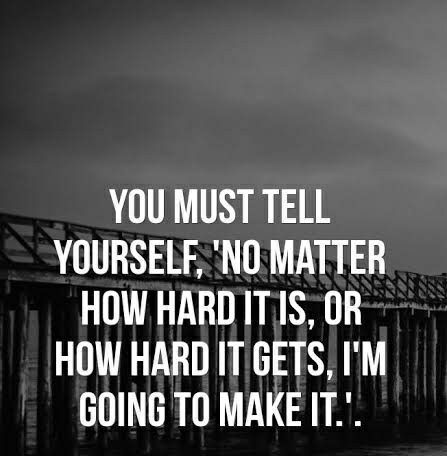

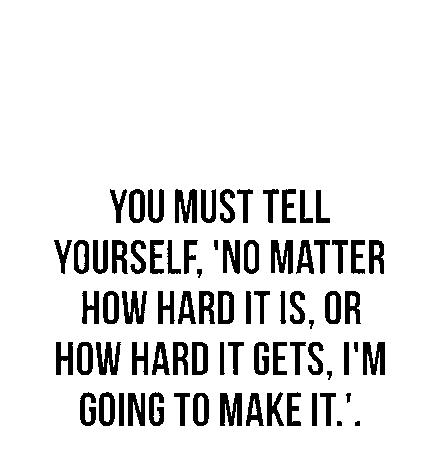

In [41]:
img = cv2.imread('/content/drive/MyDrive/OffNoteLabsTask/sampleText4.jpg')
result = text_detection_mask_and_dialation(img)
cv2_imshow(img)
cv2_imshow(result)

Text detected after applying mask:



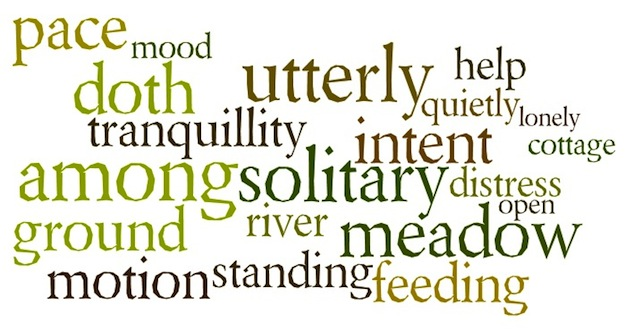

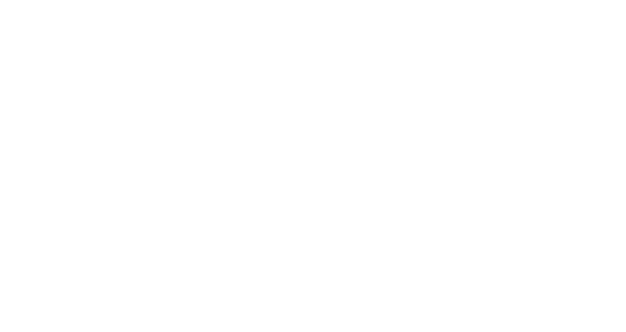

In [42]:
img = cv2.imread('/content/drive/MyDrive/OffNoteLabsTask/words.jpg')
result = text_detection_mask_and_dialation(img)
cv2_imshow(img)
cv2_imshow(result)

# Text Extraction - Grayscale and Thresholding
1. Get a graysacle of the frame
2. Apply thresholding on the grayscaled frame
3. Apply "pytesseract.image_to_string()" on the frame
4. print the text

In [29]:
def text_detection_grayscale_thresholding(img):
  image = img

  gray = get_grayscale(image)
  img = thresholding(gray)

  result = img
  data = pytesseract.image_to_string(result, lang='eng',config='--psm6')

  #cv2_imshow(image)
  #cv2_imshow(result)
  print('Text detected after grayscale and thresholding:')
  print(data)
  cv2.waitKey()
  return result

## Text Extraction on video and text - Grayscale and Thresholding

Video used: "trimmedRickRoll.mp4"

In [26]:
import numpy as np
import cv2
cap = cv2.VideoCapture('/content/drive/MyDrive/OffNoteLabsTask/trimmedRickRoll.mp4')
#cap.set(cv2.CAP_PROP_FPS, 10000) 
i = 0;
while(cap.isOpened()):
    ret, frame = cap.read()
    if ret == False:
        break
    i+=1
    result = text_detection_grayscale_thresholding(frame)
    
    # USE THE CODE BELOW IN CASE OF JYUPITER NOTEBOOK 
    # TO SEE THE FRAME SIDE BY SIDE WITH THE EXTRACTED TEXT

    #cv2.imshow(frame)
    #cv2.imshow(result)
    if cv2.waitKey(2) & 0xFF == ord('q'):
        break
print(i)
cap.release()
cv2.destroyAllWindows()

Text detected after grayscale and thresholding:
NEVER GONNA GIVE
you UP

Text detected after grayscale and thresholding:
NEVER GONNA GIVE
you UP

Text detected after grayscale and thresholding:
NEVER GONNA GIVE
you UP

Text detected after grayscale and thresholding:
NEVER GONNA GIVE
you UP

Text detected after grayscale and thresholding:
NEVER GONNA GIVE
you UP

Text detected after grayscale and thresholding:
NEVER GONNA GIVE
you UP

Text detected after grayscale and thresholding:
NEVER GONNA GIVE
you UP

Text detected after grayscale and thresholding:
NEVER GONNA GIVE
you UP

Text detected after grayscale and thresholding:
NEVER GONNA GIVE
you UP

Text detected after grayscale and thresholding:
NEVER GONNA GIVE
YOu UP

Text detected after grayscale and thresholding:
NEVER GONNA GIVE
you UP

Text detected after grayscale and thresholding:
NEVER GONNA GIVE
YOu UP

Text detected after grayscale and thresholding:
NEVER GONNA GIVE
you UP

Text detected after grayscale and thre

Video used: "trimmedNews.mp4"

In [27]:
import numpy as np
import cv2
cap = cv2.VideoCapture('/content/drive/MyDrive/OffNoteLabsTask/trimmedNews.mp4')
#cap.set(cv2.CAP_PROP_FPS, 10000) 
i = 0;
while(cap.isOpened()):
    ret, frame = cap.read()
    if ret == False:
        break
    i+=1
    result = text_detection_grayscale_thresholding(frame)

    # USE THE CODE BELOW IN CASE OF JYUPITER NOTEBOOK 
    # TO SEE THE FRAME SIDE BY SIDE WITH THE EXTRACTED TEXT

    #cv2.imshow(frame)
    #cv2.imshow(result)
    if cv2.waitKey(2) & 0xFF == ord('q'):
        break
print(i)
cap.release()
cv2.destroyAllWindows()

Text detected after grayscale and thresholding:
 

are nr ON ol Te ma

‘6 POSITIVITY

RATE HAS
REDUCED IN
"1. DELHI

VEU Psu
et

    

Text detected after grayscale and thresholding:
 

se: MZ ON el Ta mi

‘6 POSITIVITY
RATE HAS

REDUCED IN
ri DELHI

SUA eee
ae ee

    

Text detected after grayscale and thresholding:
se: AZ a eT mas

 

‘6 POSITIVITY

RATE HAS
REDUCED IN
ri DELHI

ARVIND KEJRIWAL
ee

    

Text detected after grayscale and thresholding:
 

T ‘6 POSITIVITY
RATE HAS

REDUCED IN

ie DELHI
PL eS Ee
ee

    

Text detected after grayscale and thresholding:
se: MZ ON dT ms

 

‘G POSITIVITY

RATE HAS
REDUCED IN
ri DELHI

PL Oa Ee
et

    

Text detected after grayscale and thresholding:
 

so: MZ ON od Ta mai

‘G POSITIVITY

RATE HAS
REDUCED IN
ri DELHI

PL Oe Ee
et

    

Text detected after grayscale and thresholding:
 

se: MZ ON dT ms

‘G POSITIVITY

RATE HAS
REDUCED IN
ri DELHI

aI
DELHI CM

    

Text detected after grayscale and thresholding:
so MG ON od mai



## Text Extraction on Images - Grayscale and Thresholding

Text detected after grayscale and thresholding:
   

   
  
  
  

t

Nas mgthers.
ae Marte) AE Gh ?
IN foBeat-valme lerers an

i
That's'his. _ | 7
i

eee or) ee ee)



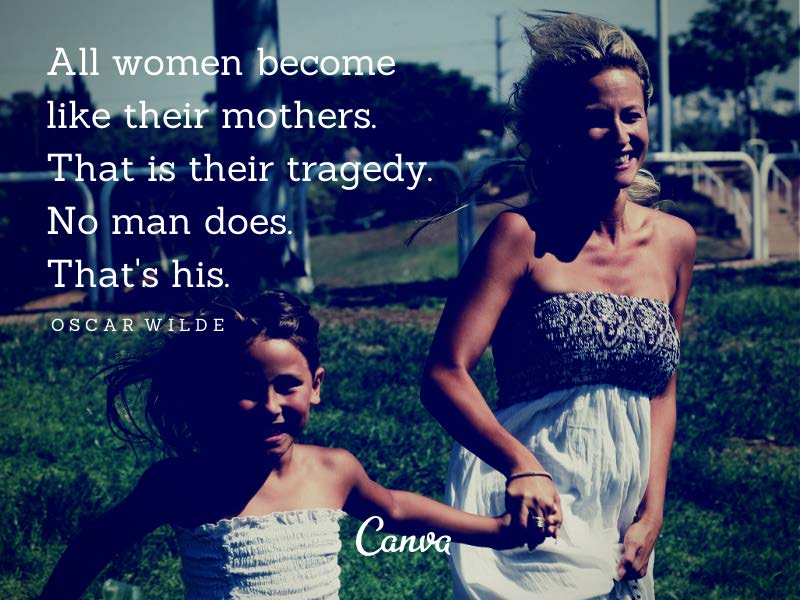

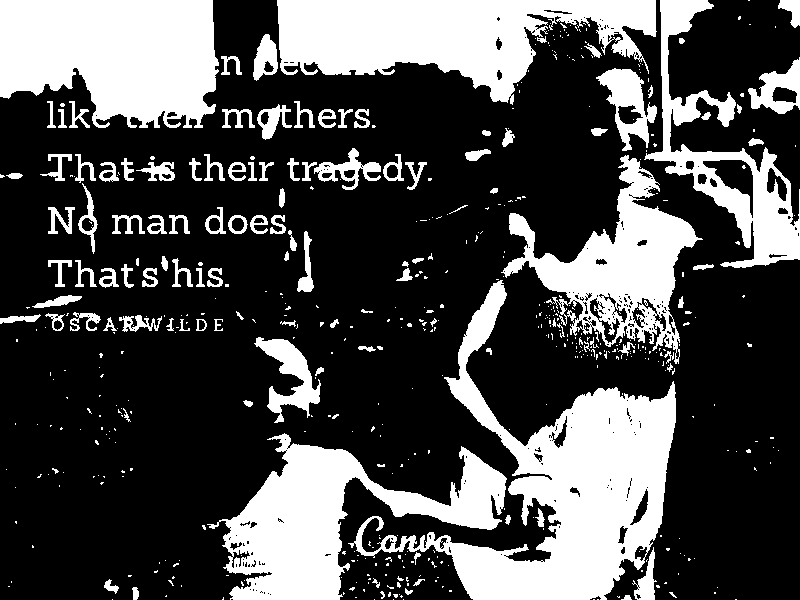

In [30]:
img = cv2.imread('/content/drive/MyDrive/OffNoteLabsTask/img.jpg')
result = text_detection_grayscale_thresholding(img)
cv2_imshow(img)
cv2_imshow(result)

Text detected after grayscale and thresholding:
DELHI LOCKDOWN EXTENDED

‘6 POSITIVITY
RATE HAS

REDUCED IN

on DELHI
ARVIND KEJRIWAL
ee ot

          

es Arvind Kejriwal, Delhi Chief Minister



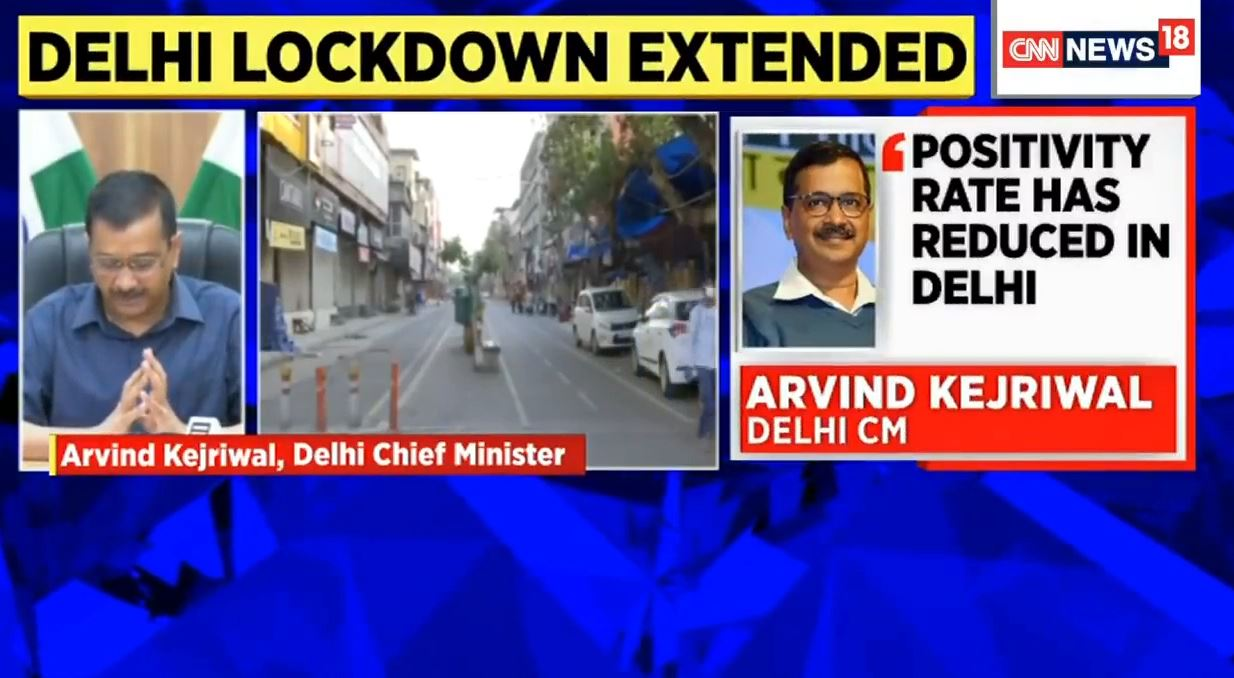

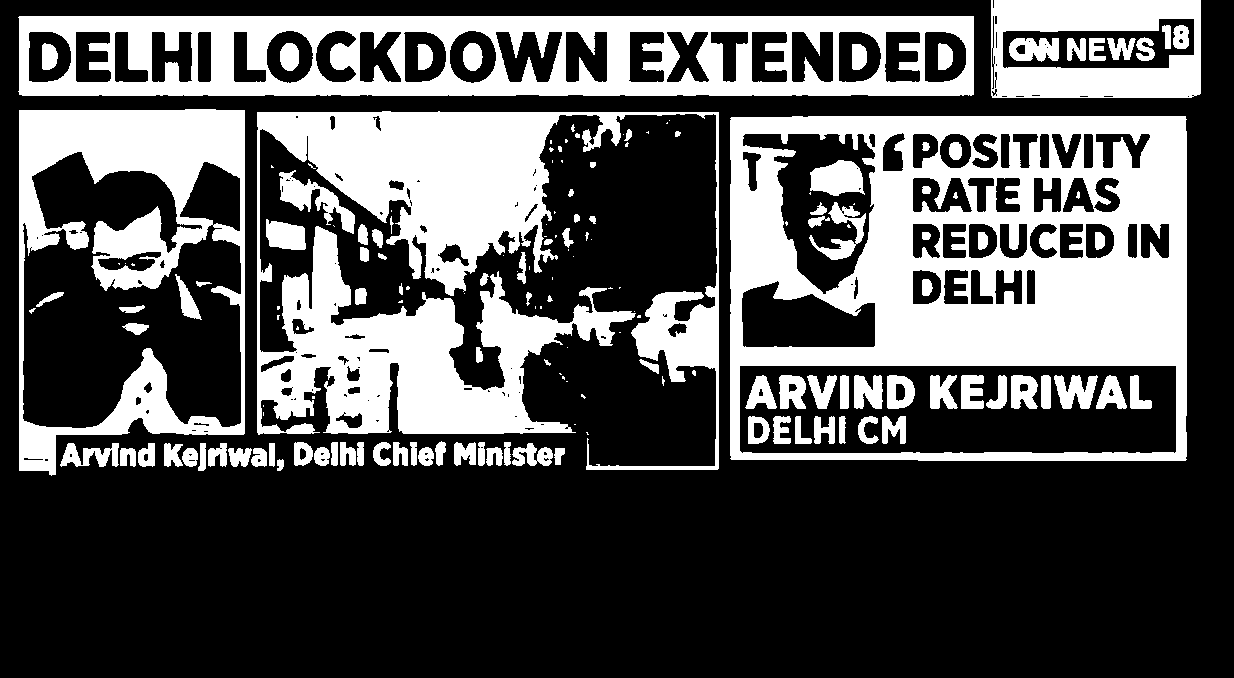

In [31]:
img = cv2.imread('/content/drive/MyDrive/OffNoteLabsTask/news.JPG')
result = text_detection_grayscale_thresholding(img)
cv2_imshow(img)
cv2_imshow(result)

Text detected after grayscale and thresholding:
Sample text here



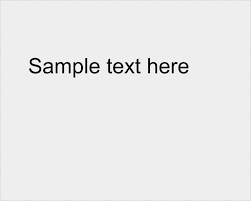

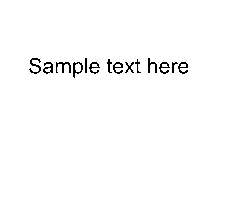

In [32]:
img = cv2.imread('/content/drive/MyDrive/OffNoteLabsTask/sampleText.png')
result = text_detection_grayscale_thresholding(img)
cv2_imshow(img)
cv2_imshow(result)

Text detected after grayscale and thresholding:
 
  

How to
turn on text
to speech



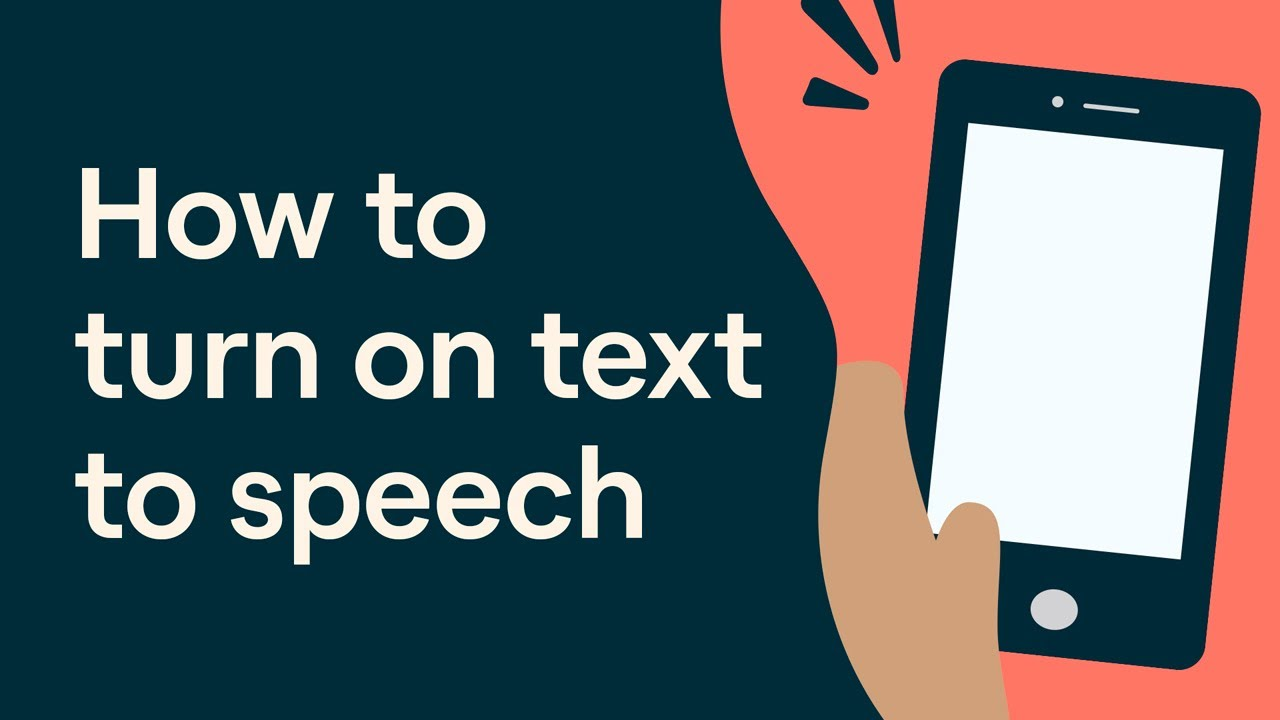

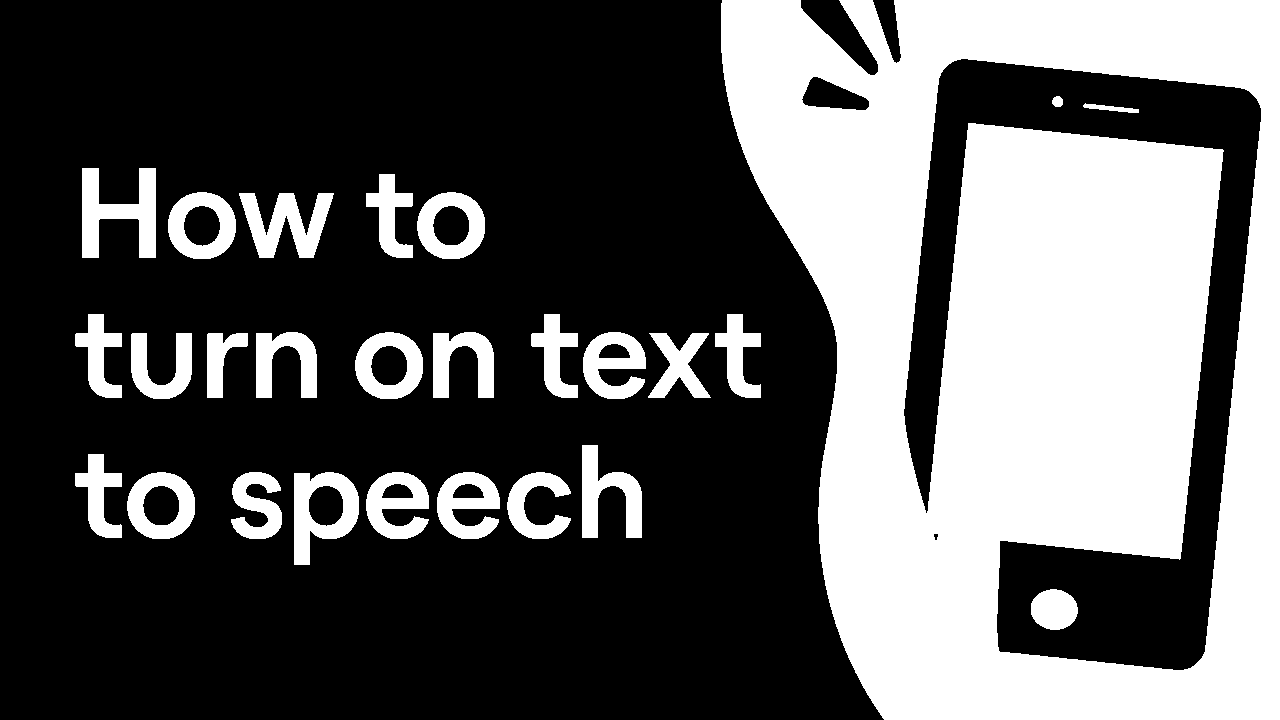

In [33]:
img = cv2.imread('/content/drive/MyDrive/OffNoteLabsTask/sampleText3.jpg')
result = text_detection_grayscale_thresholding(img)
cv2_imshow(img)
cv2_imshow(result)

Text detected after grayscale and thresholding:
YOU MUST TELL
YOURSELF, ‘NO MATTER
HOW HARD ITIS, OR
HOW HARD IT GETS, I'M
TT TEA Ca



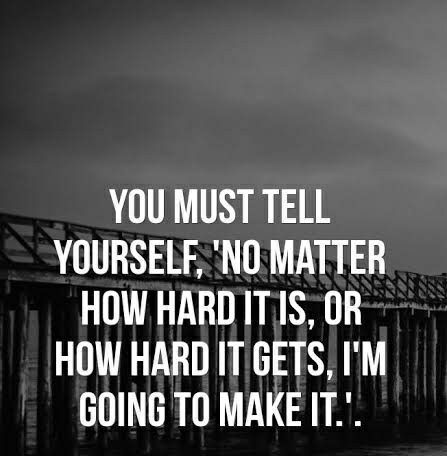

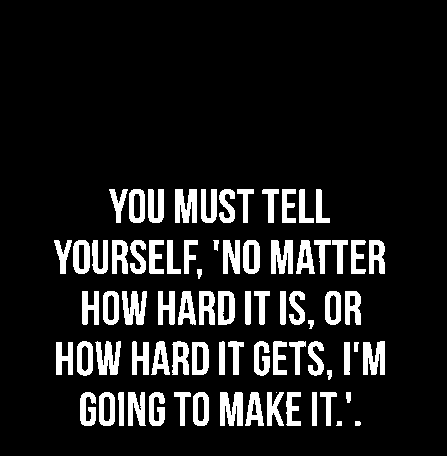

In [34]:
img = cv2.imread('/content/drive/MyDrive/OffNoteLabsTask/sampleText4.jpg')
result = text_detection_grayscale_thresholding(img)
cv2_imshow(img)
cv2_imshow(result)

Text detected after grayscale and thresholding:
PaCe mood
doth utterly, PoP
tranquillity - Intent cottage
aM on gsolitarVaistrss
ground * tver meadow
motionstandingfeeding



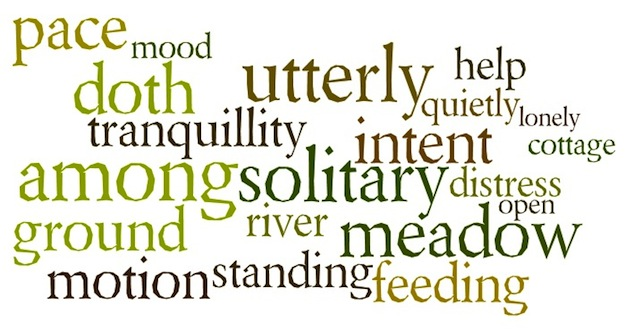

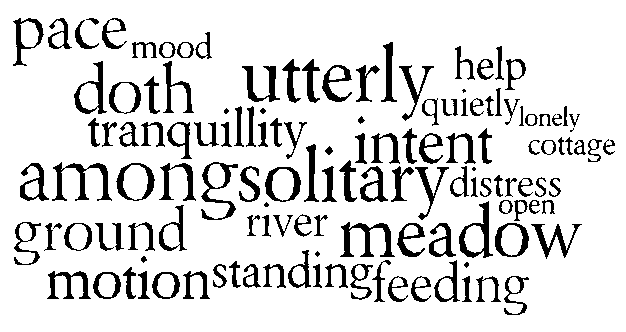

In [35]:
img = cv2.imread('/content/drive/MyDrive/OffNoteLabsTask/words.jpg')
result = text_detection_grayscale_thresholding(img)
cv2_imshow(img)
cv2_imshow(result)

# Analysis of the result

## Mask Only
1. Works for frames with simple as well as complex backgrounds.
2. Has trouble detecting text when it is transitioning in the video.
3. Hard to detect text when it isn't formatted well and distributed randomly on the frame.

## Mask and Dilation
1. Incosistent quality of result, works really well for some frames with complex background while it fails completely for frames with simple backgrounds.
2. Has trouble detecting text when it is transitioning in the video.
3. Hard to detect text when it isn't formatted well and distributed randomly on the frame.

## Grayscaling and Thresholding
1. Works for frames with simple as well as complex backgrounds, result is satisfactory for frames with complex backgrounds.
2. Works really well on frames with simple backgrounds.
3. Has trouble detecting text when it is transitioning in the video.
4. Works well with text distributed un-evenly throughout the frame.
5. Best results compared to the other two methods.

(I tried different preprocessing functions like "Canny edges", "erosion", etc. This one worked the best, thresholding an image proved to be a good way to detect and extract text)